In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

In [3]:
data = pd.read_csv("./household_power_consumption.txt", sep=";", 
parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
low_memory=False, na_values=['nan','?'], index_col='dt')

print("Shape of data: " + str(data.shape))

Shape of data: (2075259, 7)


In [21]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [5]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [6]:
data = data.dropna(how="all")

In [7]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

<AxesSubplot:>

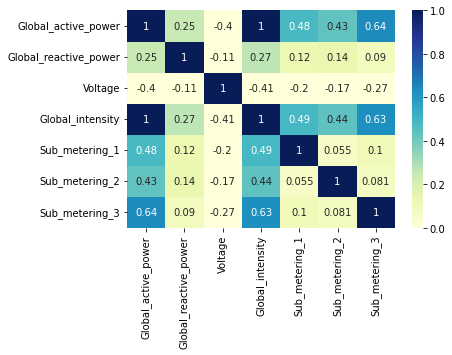

In [8]:
sns.heatmap(data.corr(), vmax=1, vmin=0, cmap="YlGnBu", annot=True)

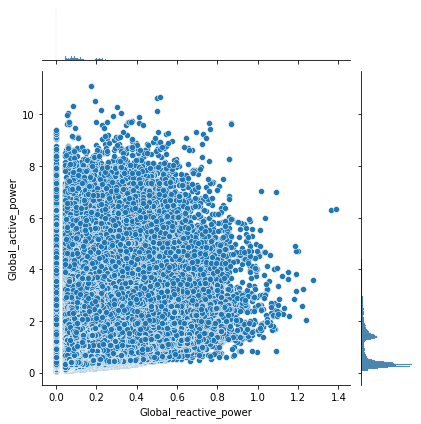

In [9]:
sns.jointplot(x=data["Global_reactive_power"], y=data["Global_active_power"], kind="scatter")

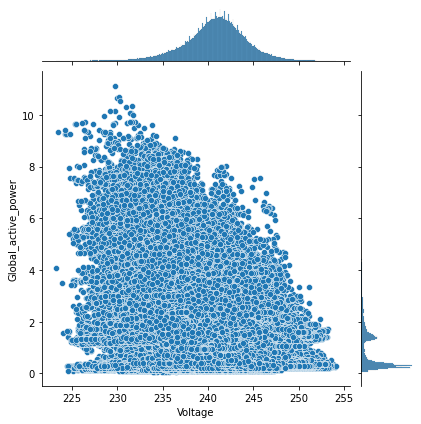

In [10]:
sns.jointplot(x=data["Voltage"], y=data["Global_active_power"], kind="scatter")

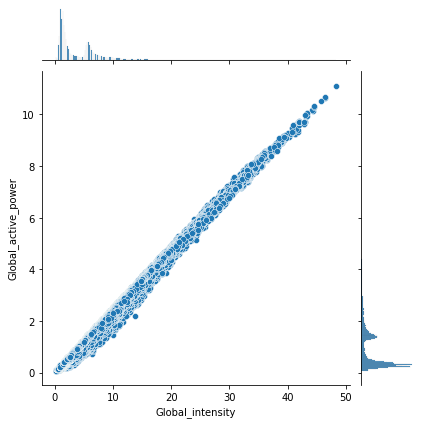

In [11]:
sns.jointplot(x=data["Global_intensity"], y=data["Global_active_power"], kind="scatter")

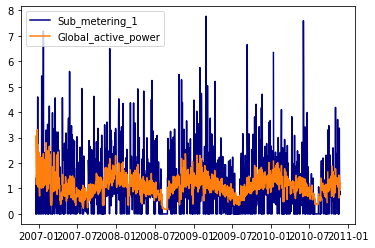

In [12]:
plt.plot(data.iloc[:,4:5].resample("D").mean(), color="navy", label="Sub_metering_1")
plt.plot(data.iloc[:,0:1].resample("D").mean(), "tab:orange", label="Global_active_power")
plt.legend()

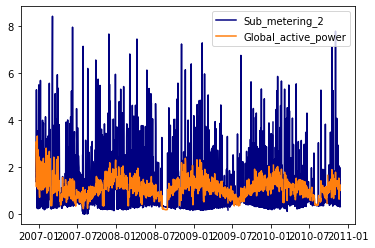

In [13]:
plt.plot(data.iloc[:,5:6].resample("D").mean(), color="navy", label="Sub_metering_2")
plt.plot(data.iloc[:,0:1].resample("D").mean(), "tab:orange", label="Global_active_power")
plt.legend()

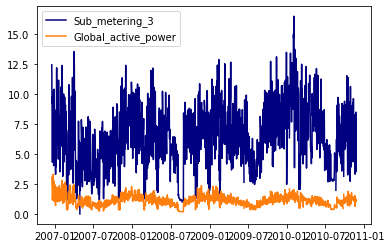

In [14]:
plt.plot(data.iloc[:,6:7].resample("D").mean(), color="navy", label="Sub_metering_3")
plt.plot(data.iloc[:,0:1].resample("D").mean(), "tab:orange", label="Global_active_power")
plt.legend()

In [15]:
x = data.iloc[:, 2:7]
y = data.iloc[:, 0:1]
print("x shape: " + str(x.shape))
print("y shape: " + str(y.shape))

x shape: (2049280, 5)
y shape: (2049280, 1)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
print("x_train :" + str(x_train.shape))
print("x_test :" + str(x_test.shape))
print("y_train :" + str(y_train.shape))
print("y_test :" + str(y_test.shape))

x_train :(1639424, 5)
x_test :(409856, 5)
y_train :(1639424, 1)
y_test :(409856, 1)


In [17]:
lr = LinearRegression()
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)

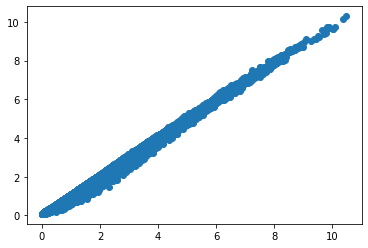

In [18]:
plt.scatter(y=y_test, x=prediction)

In [19]:
print("Mean absolute error: " + str(metrics.mean_absolute_error(y_test, prediction)))
print("Mean squared error: " + str(metrics.mean_squared_error(y_test, prediction)))
print("Root mean squared error: " + str(np.sqrt(metrics.mean_squared_error(y_test, prediction))))
print("R^2 :" + str(metrics.r2_score(y_test, prediction)))

Mean absolute error: 0.02969426305075649
Mean squared error: 0.002010429917769464
Root mean squared error: 0.04483781794166018
R^2 :0.9981993845867724


In [20]:
pickle.dump(lr, open("PCA_model.pkl", "wb"))